### Dataset Overview:
- **Name:** EEG Motor Imagery (BCIC IV 2a)
- **Source:** BCI Competition IV
- **Description:** The dataset consists of EEG recordings from subjects performing motor imagery tasks. Motor imagery is the mental simulation of movement without actual physical movement. In this dataset, subjects were asked to imagine left-hand and right-hand movements.
- **Recording Method:** EEG signals were recorded using a 22-channel EEG system.
- **Session Structure:** Each recording session consisted of several trials, and each trial included a cue indicating the movement type (left or right hand) and a subsequent motor imagery period.
- **Objective:** The dataset is commonly used for EEG-based motor imagery classification tasks, but we are going to use it for person idnetification .
- The dataset is available on Kaggle at the following link: [EEG Motor Imagery (BCIC IV 2a) Dataset](https://www.kaggle.com/datasets/aymanmostafa11/eeg-motor-imagery-bciciv-2a)



### Loading Dataset

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import utils as np_utils
from scipy import signal

In [ ]:
!pip install kaggle
from google.colab import files
files.upload()
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d aymanmostafa11/eeg-motor-imagery-bciciv-2a
!unzip /content/eeg-motor-imagery-bciciv-2a.zip

Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/aymanmostafa11/eeg-motor-imagery-bciciv-2a
License(s): CC0-1.0
 92% 148M/161M [00:01<00:00, 136MB/s]
100% 161M/161M [00:01<00:00, 149MB/s]
Archive:  /content/eeg-motor-imagery-bciciv-2a.zip
  inflating: BCICIV_2a_all_patients.csv  
  inflating: patients/patients/BCICIV_2a_1.csv  
  inflating: patients/patients/BCICIV_2a_2.csv  
  inflating: patients/patients/BCICIV_2a_3.csv  
  inflating: patients/patients/BCICIV_2a_4.csv  
  inflating: patients/patients/BCICIV_2a_5.csv  
  inflating: patients/patients/BCICIV_2a_6.csv  
  inflating: patients/patients/BCICIV_2a_7.csv  
  inflating: patients/patients/BCICIV_2a_8.csv  
  inflating: patients/patients/BCICIV_2a_9.csv  


In [ ]:
data = pd.read_csv("/content/BCICIV_2a_all_patients.csv")
data.head()

,patient,time,label,epoch,EEG-Fz,EEG-0,EEG-1,EEG-2,EEG-3,EEG-4,...,EEG-8,EEG-9,EEG-10,EEG-11,EEG-12,EEG-13,EEG-14,EEG-Pz,EEG-15,EEG-16
0,1,-0.100,tongue,8,-1.681412,2.245496,-0.158350,1.163765,-1.523659,-0.575267,...,0.758116,3.441785,0.305517,1.137473,-1.275763,-2.898359,0.656704,-2.010063,-1.613804,-1.942455
1,1,-0.096,tongue,8,0.420417,0.587559,1.650510,0.970672,1.505904,0.891796,...,1.541586,-0.071620,0.258909,-1.448198,0.142472,-1.968405,-1.733655,-2.935578,-3.125256,-4.674610
2,1,-0.092,tongue,8,0.551365,1.499758,0.121302,2.859433,2.613414,4.636026,...,2.649097,-2.137938,-1.612096,-1.610218,-0.410173,-0.274957,-4.776535,-5.099551,-2.798995,-5.862021
3,1,-0.088,tongue,8,3.054916,-1.807238,1.843603,2.286812,5.995872,6.651295,...,6.031554,-5.249621,-2.672998,-3.452370,0.189081,1.593829,-6.081577,-5.476860,-2.932163,-6.874095
4,1,-0.084,tongue,8,2.506710,-2.453101,0.221178,0.127278,4.519931,6.249573,...,7.827097,-5.309546,-2.488783,-3.707608,1.447515,4.268278,-4.383690,-4.218426,-1.331932,-5.322692


In [ ]:
# Display dataset information
print("Dataset Information:")
print(data.info())

# Check for missing values
missing_values = data.isnull().sum()
print("\nMissing Values:")
print(missing_values)

# Describe the dataset
description = data.describe()
print("\nDataset Description:")
print(description)

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 492048 entries, 0 to 492047
Data columns (total 26 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   patient  492048 non-null  int64  
 1   time     492048 non-null  float64
 2   label    492048 non-null  object 
 3   epoch    492048 non-null  int64  
 4   EEG-Fz   492048 non-null  float64
 5   EEG-0    492048 non-null  float64
 6   EEG-1    492048 non-null  float64
 7   EEG-2    492048 non-null  float64
 8   EEG-3    492048 non-null  float64
 9   EEG-4    492048 non-null  float64
 10  EEG-5    492048 non-null  float64
 11  EEG-C3   492048 non-null  float64
 12  EEG-6    492048 non-null  float64
 13  EEG-Cz   492048 non-null  float64
 14  EEG-7    492048 non-null  float64
 15  EEG-C4   492048 non-null  float64
 16  EEG-8    492048 non-null  float64
 17  EEG-9    492048 non-null  float64
 18  EEG-10   492048 non-null  float64
 19  EEG-11   492048 non-null  float64
 20  EEG-1

### Visualization

This plot illustrates simulated EEG signals from two channels related to tongue movement for patient 1.

(201, 26)


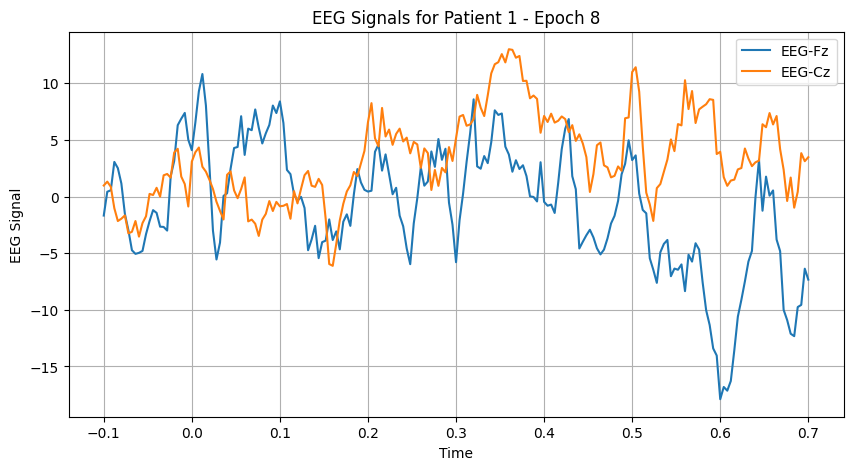

In [ ]:


# Filter data for patient 1
data_patient_1 = data[data['patient'] == 1]

# Select the epoch you want to plot
epoch_to_plot = 8  # Change this to the desired epoch number

# Filter data for the selected epoch
data_patient_1_epoch = data_patient_1[data_patient_1['epoch'] == epoch_to_plot]

# Select some EEG channels to plot
channels_to_plot = ['EEG-Fz', 'EEG-Cz']  # You can choose any channels you want to visualize
print(data_patient_1_epoch.shape)
# Plot EEG signals for patient 1 and the selected epoch and channels
plt.figure(figsize=(10, 5))
for channel in channels_to_plot:
    plt.plot(data_patient_1_epoch['time'], data_patient_1_epoch[channel], label=channel)

plt.xlabel('Time')
plt.ylabel('EEG Signal')
plt.title(f'EEG Signals for Patient 1 - Epoch {epoch_to_plot}')
plt.legend()
plt.grid(True)
plt.show()

### Preprocessing

In [ ]:

# Apply normalization (example: z-score normalization)
scaler = StandardScaler()
data.iloc[:, 4:] = scaler.fit_transform(data.iloc[:, 4:])

In [ ]:

# Sort the DataFrame by 'patient' and 'epoch' columns
data.sort_values(by=['patient', 'epoch'], inplace=True)

# Epoching (assuming each epoch contains 8 time steps)
epochs = []
labels = []
for _, group in data.groupby(['patient', 'epoch']):
    epoch_data = group.iloc[:, 4:].values  # Extract EEG data
    epochs.append(epoch_data)
    # Extract the corresponding label for the epoch
    label = group['patient'].iloc[0]  # Assuming each epoch has the same label
    labels.append(label)

# Stack epoch data into a 3D array
X = np.stack(epochs)
y = np.array(labels)

# convert labels to one-hot encodings.
print("X shape : " , X.shape)
print("y shape :"  , y.shape)

X shape :  (2448, 201, 22)
y shape : (2448,)


In [ ]:
#since each model has its own data format
def preprocess( model , X=X,y=y ,chans = 22,samples = 201):
  if model == 'eegnet':
        # Assuming labels start from 0
        y_process = np_utils.to_categorical(y-1)
        X = X.reshape(X.shape[0], chans, samples, 1)

  else:
        label_encoder = LabelEncoder()
        y_process = label_encoder.fit_transform(y)
  # Split data into training and testing sets
  X_train, X_test, y_train, y_test = train_test_split(X, y_process, test_size=0.2, random_state=42)
  print ( "X_train shape " , X_train.shape)
  print ( "y_train shape " , y_train.shape)
  print ( "X_test shape " , X_test.shape)
  print ( "y_test shape " , y_test.shape)
  return X_train, X_test, y_train, y_test

### Data Augmentation

In [ ]:


def min_max_amplitude_scale(data, scale_range=(0.5, 2.0)):
    scaled_data = np.copy(data)
    min_val, max_val = scale_range
    scaled_data = (scaled_data - np.min(scaled_data)) * (max_val - min_val) / (np.max(scaled_data) - np.min(scaled_data)) + min_val
    return scaled_data

def time_shift(data, max_shift=50):
    augmented_data = np.copy(data)
    shift = np.random.randint(-max_shift, max_shift + 1)
    if shift >= 0:
        augmented_data[:, :, shift:] = data[:, :, :-shift]
    else:
        augmented_data[:, :, :shift] = data[:, :, -shift:]
    return augmented_data

def dc_shift(data, shift_value=10):

    augmented_data = np.copy(data)
    augmented_data += shift_value
    return augmented_data

def zero_masking(data, mask_length=150):
    augmented_data = np.copy(data)
    if mask_length < data.shape[2]:
        mask_start = np.random.randint(0, data.shape[2] - mask_length)
        augmented_data[:, :, mask_start:mask_start + mask_length] = 0
    return augmented_data


def additive_gaussian_noise(data, noise_std=0.2):
    noise = np.random.normal(scale=noise_std, size=data.shape)
    augmented_data = data + noise
    return augmented_data

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = preprocess(model = 'eegnet')

X_train shape  (1958, 22, 201, 1)
y_train shape  (1958, 9)
X_test shape  (490, 22, 201, 1)
y_test shape  (490, 9)


In [ ]:

X_train_augmented = min_max_amplitude_scale(X_train)
X_train_augmented = time_shift(X_train)
X_train_augmented = dc_shift(X_train)
X_train_augmented = zero_masking(X_train)
X_train_augmented = additive_gaussian_noise(X_train)

### Model Building

#### EEGNET Model

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Activation, Permute, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from tensorflow.keras.layers import SeparableConv2D, DepthwiseConv2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import SpatialDropout2D
from tensorflow.keras.regularizers import l1_l2
from tensorflow.keras.layers import Input, Flatten
from tensorflow.keras.constraints import max_norm
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import EarlyStopping

Keras Implementation of EEGNet
    http://iopscience.iop.org/article/10.1088/1741-2552/aace8c/meta

In [ ]:

def EEGNet(nb_classes, Chans = 64, Samples = 128,
             dropoutRate = 0.5, kernLength = 64, F1 = 8,
             D = 2, F2 = 16, norm_rate = 0.25, dropoutType = 'Dropout'):


    if dropoutType == 'SpatialDropout2D':
        dropoutType = SpatialDropout2D
    elif dropoutType == 'Dropout':
        dropoutType = Dropout
    else:
        raise ValueError('dropoutType must be one of SpatialDropout2D '
                         'or Dropout, passed as a string.')

    input1   = Input(shape = (Chans, Samples, 1))

    ##################################################################
    block1       = Conv2D(F1, (1, kernLength), padding = 'same',
                                   input_shape = (Chans, Samples, 1),
                                   use_bias = False)(input1)
    block1       = BatchNormalization()(block1)
    block1       = DepthwiseConv2D((Chans, 1), use_bias = False,
                                   depth_multiplier = D,
                                   depthwise_constraint = max_norm(1.))(block1)
    block1       = BatchNormalization()(block1)
    block1       = Activation('elu')(block1)
    block1       = AveragePooling2D((1, 6))(block1)
    block1       = dropoutType(dropoutRate)(block1)

    block2       = SeparableConv2D(F2, (1, 16),
                                   use_bias = False, padding = 'same')(block1)
    block2       = BatchNormalization()(block2)
    block2       = Activation('elu')(block2)
    block2       = AveragePooling2D((1, 12))(block2)
    block2       = dropoutType(dropoutRate)(block2)

    flatten      = Flatten(name = 'flatten')(block2)

    dense        = Dense(nb_classes, name = 'dense',
                         kernel_constraint = max_norm(norm_rate))(flatten)
    softmax      = Activation('softmax', name = 'softmax')(dense)

    return Model(inputs=input1, outputs=softmax)


In [ ]:
model  = EEGNet(nb_classes=9, Chans = 22, Samples = 201,
             dropoutRate = 0.5, kernLength = 100, F1 = 8,
             D = 2, F2 = 16, norm_rate = 0.25, dropoutType = 'Dropout')

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics = ['accuracy'])

In [ ]:
# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [ ]:
fittedModel = model.fit(X_train_augmented, y_train, batch_size = 32, epochs = 200,
                        verbose = 2, validation_split=0.2,callbacks=[early_stopping])

Epoch 1/200
49/49 - 34s - loss: 2.1579 - accuracy: 0.1858 - val_loss: 2.1906 - val_accuracy: 0.1735 - 34s/epoch - 691ms/step
Epoch 2/200
49/49 - 25s - loss: 1.9914 - accuracy: 0.2631 - val_loss: 2.1367 - val_accuracy: 0.2270 - 25s/epoch - 510ms/step
Epoch 3/200
49/49 - 14s - loss: 1.8303 - accuracy: 0.3582 - val_loss: 2.0346 - val_accuracy: 0.2500 - 14s/epoch - 277ms/step
Epoch 4/200
49/49 - 12s - loss: 1.7559 - accuracy: 0.3768 - val_loss: 1.9010 - val_accuracy: 0.3495 - 12s/epoch - 249ms/step
Epoch 5/200
49/49 - 11s - loss: 1.7128 - accuracy: 0.3838 - val_loss: 1.7791 - val_accuracy: 0.4082 - 11s/epoch - 231ms/step
Epoch 6/200
49/49 - 13s - loss: 1.6840 - accuracy: 0.4093 - val_loss: 1.6914 - val_accuracy: 0.4235 - 13s/epoch - 264ms/step
Epoch 7/200
49/49 - 13s - loss: 1.6558 - accuracy: 0.4125 - val_loss: 1.6334 - val_accuracy: 0.4388 - 13s/epoch - 269ms/step
Epoch 8/200
49/49 - 12s - loss: 1.6231 - accuracy: 0.4330 - val_loss: 1.5841 - val_accuracy: 0.4235 - 12s/epoch - 253ms/step


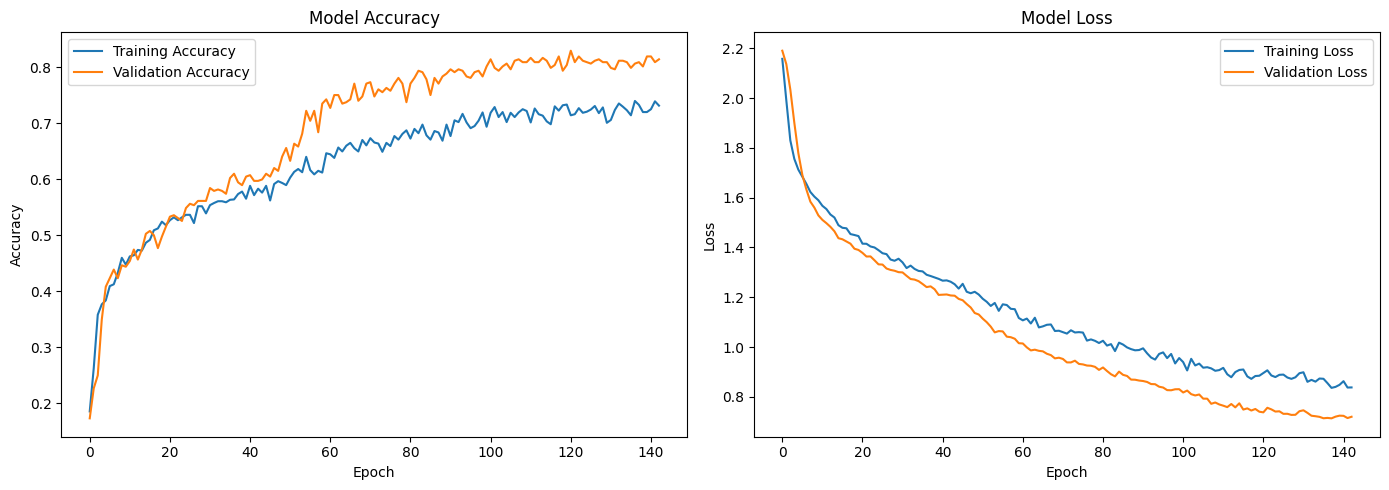

In [ ]:
import matplotlib.pyplot as plt

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# Plot accuracy
axs[0].plot(fittedModel.history['accuracy'], label='Training Accuracy')
axs[0].plot(fittedModel.history['val_accuracy'], label='Validation Accuracy')
axs[0].set_title('Model Accuracy')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')
axs[0].legend()

# Plot loss
axs[1].plot(fittedModel.history['loss'], label='Training Loss')
axs[1].plot(fittedModel.history['val_loss'], label='Validation Loss')
axs[1].set_title('Model Loss')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
axs[1].legend()

# Adjust layout
plt.tight_layout()
plt.show()


### Evaluation

In [ ]:
# Evaluate the model on the training data
train_loss, train_accuracy = model.evaluate(X_train, y_train)

print(f"Train Loss: {train_loss}")
print(f"Train Accuracy: {train_accuracy}")


62/62 [==============================] - 5s 81ms/step - loss: 0.6238 - accuracy: 0.8744
Train Loss: 0.6238361597061157
Train Accuracy: 0.8743615746498108


In [ ]:
# Evaluate the model on the training data
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print(f"Train Loss: {test_loss}")
print(f"Train Accuracy: {test_accuracy}")

16/16 [==============================] - 2s 123ms/step - loss: 0.7259 - accuracy: 0.8163
Train Loss: 0.7258772253990173
Train Accuracy: 0.8163265585899353


In [ ]:
# Save the weights
model.save_weights('eeg_model_weights.h5')

16/16 [==============================] - 2s 106ms/step


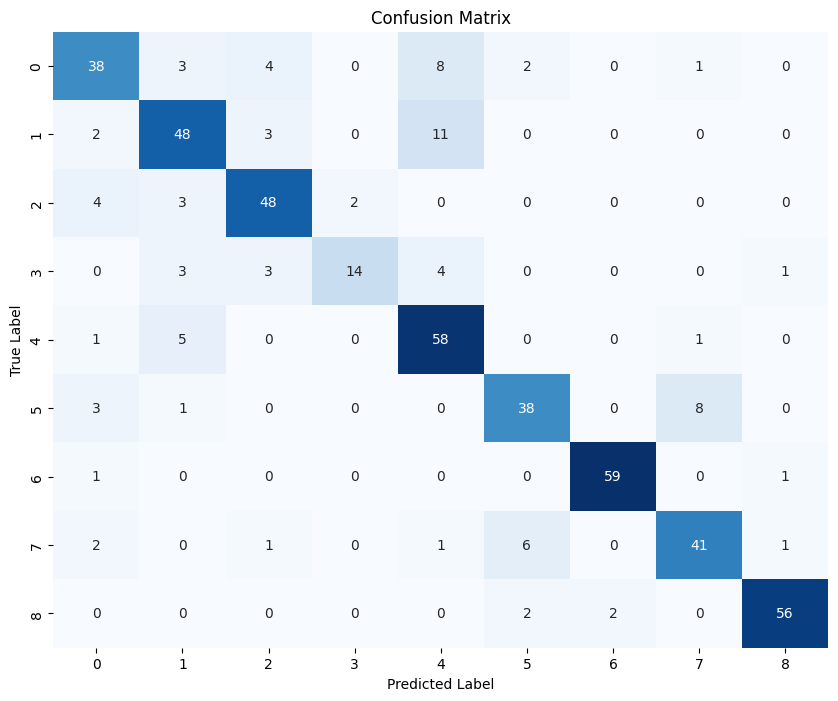

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Assuming you have already trained your model and obtained predictions on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Calculate confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
# Calculate True Positives, False Positives, and False Negatives
TP = np.diag(cm)
FP = np.sum(cm, axis=0) - TP
FN = np.sum(cm, axis=1) - TP

# Calculate Precision and Recall
precision = TP / (TP + FP)
recall = TP / (TP + FN)

# Print Precision and Recall for each class
for i in range(len(precision)):
    print(f'Class {i+1}: Precision = {precision[i]}, Recall = {recall[i]}')


Class 1: Precision = 0.7450980392156863, Recall = 0.6785714285714286
Class 2: Precision = 0.7619047619047619, Recall = 0.75
Class 3: Precision = 0.8135593220338984, Recall = 0.8421052631578947
Class 4: Precision = 0.875, Recall = 0.56
Class 5: Precision = 0.7073170731707317, Recall = 0.8923076923076924
Class 6: Precision = 0.7916666666666666, Recall = 0.76
Class 7: Precision = 0.9672131147540983, Recall = 0.9672131147540983
Class 8: Precision = 0.803921568627451, Recall = 0.7884615384615384
Class 9: Precision = 0.9491525423728814, Recall = 0.9333333333333333
